In [11]:
from DB import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')
mpl.rcParams['axes.unicode_minus'] = False

font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
# print(font_name)
rc('font', family=font_name)

db_connection = connect_db()

In [3]:
df = load_data_from_rds('MainData', db_connection)
df.head()

,번호,위도,경도,폭,연장,높이,개방도,차선_수,생태통로타입,등산객이용빈도,...,주변동물 출현빈도,주변 로드킬 빈도,산책로까지의 최단 거리(km),최고제한속도(km/h),농가까지의 거리(km),교통량,환경영향평가점수,건물까지거리(km),유도울타리_연장_m,유도울타리_높이_m
0,1495,35.36019,128.06375,5.00,45.0,NaN,NaN,4,0,1,...,2.0,0,32.993820,80.0,0.223706,7493.875000,2,0.196597,0,0.0
1,1277,37.03408,128.40661,NaN,NaN,NaN,NaN,2,1,0,...,5.0,0,189.603501,60.0,0.303690,3573.857143,1,0.358139,0,0.0
2,1278,36.89832,128.30563,NaN,NaN,NaN,NaN,2,1,0,...,NaN,0,172.236247,60.0,0.011154,3430.428571,2,0.139054,0,0.0
3,1279,36.89687,128.30581,NaN,NaN,NaN,NaN,2,1,0,...,NaN,0,172.092457,60.0,0.012767,3430.428571,2,0.044559,0,0.0
4,1090,36.71051,127.42222,8.23,38.0,NaN,NaN,6,0,5,...,NaN,5,139.902024,80.0,0.183505,34270.190476,5,0.172184,442,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   번호                497 non-null    int64  
 1   위도                497 non-null    float64
 2   경도                497 non-null    float64
 3   폭                 318 non-null    float64
 4   연장                318 non-null    float64
 5   높이                43 non-null     float64
 6   개방도               43 non-null     float64
 7   차선_수              497 non-null    int64  
 8   생태통로타입            497 non-null    int64  
 9   등산객이용빈도           497 non-null    int64  
 10  생태통로효율성           497 non-null    int64  
 11  등산로까지 최단거리(km)    497 non-null    float64
 12  식생                497 non-null    int64  
 13  경사도               497 non-null    int64  
 14  지형기호(2.3km)       497 non-null    object 
 15  주변 동물종 개수         259 non-null    float64
 16  주변동물 출현빈도         259 non-null    float64
 1

In [7]:
# 생태통로 유형별
df_overpass = df[df['생태통로타입']==0]
df_overpass.drop(['높이', '개방도'], axis=1, inplace=True)
df_tunnel = df[df['생태통로타입']!=0]

In [12]:
# 결측치 비율
def missing_ratio(df):
    df_over_null = df.isnull().sum().reset_index()
    df_over_null.columns = ['column', 'count']
    df_over_null['ratio'] = df_over_null['count']/len(df)
    df_over_null= df_over_null[df_over_null['ratio'] != 0]
    display(df_over_null)

#명목형(Norminal)
def norminal_feature(df):
    nom_feature = ['생태통로효율성', '식생']

    fig = plt.figure(figsize=(15,6))
    for i, col in enumerate(nom_feature):
        ax = fig.add_subplot(1,2, i+1)
        df[col].value_counts().plot(kind='bar')
        ax.set_title(col)
    plt.show()

#순서형(Ordinal) 그래프
def ordinal_feature(df):
    ord_feature = ['등산객이용빈도', '경사도', '환경영향평가점수']

    fig = plt.figure(figsize=(30,20))
    for i, col in enumerate(ord_feature):
        ax = fig.add_subplot(2,2,i+1)
        df[col].value_counts().plot(kind='bar')
        ax.set_title(col)
    plt.show()

#수치형 그래프
def numerical_feature(df):
    num_feature = ['차선_수', '폭', '연장', '높이', '개방도', '주변 로드킬 빈도', '산책로까지의 최단 거리(km)',
       '농가까지의 거리(km)', '최고제한속도(km/h)', '주변 동물종 개수', '주변동물 출현빈도',
       '하천거리(km)', '등산로까지 최단거리(km)', '유도울타리_연장_m', '유도울타리_높이_m', '교통량', '건물까지거리(km)']

    fig = plt.figure(figsize=(20,30))
    i = 0
    for col in num_feature:
        try:
            ax = fig.add_subplot(8,2, i+1)
            sns.distplot(df.loc[df[col].notnull(), col])
            ax.set_title(col)
            i+=1
        except :
            continue
    plt.tight_layout()
    plt.show()

def EDA(df):
    print('결측치 비율')
    missing_ratio(df)
    print('명목형 변수')
    norminal_feature(df)
    print('순서형 변수')
    ordinal_feature(df)
    print('수치형 변수')
    numerical_feature(df)

# 육교형

결측치 비율


,column,count,ratio
3,폭,31,0.103333
4,연장,31,0.103333
13,주변 동물종 개수,146,0.486667
14,주변동물 출현빈도,146,0.486667
19,교통량,8,0.026667


명목형 변수


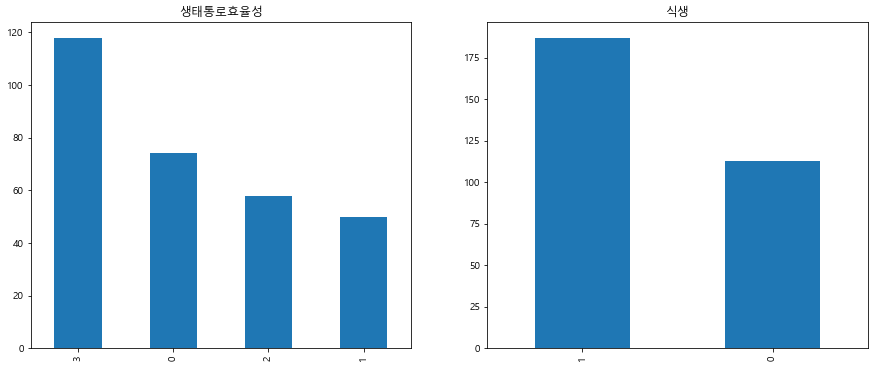

순서형 변수


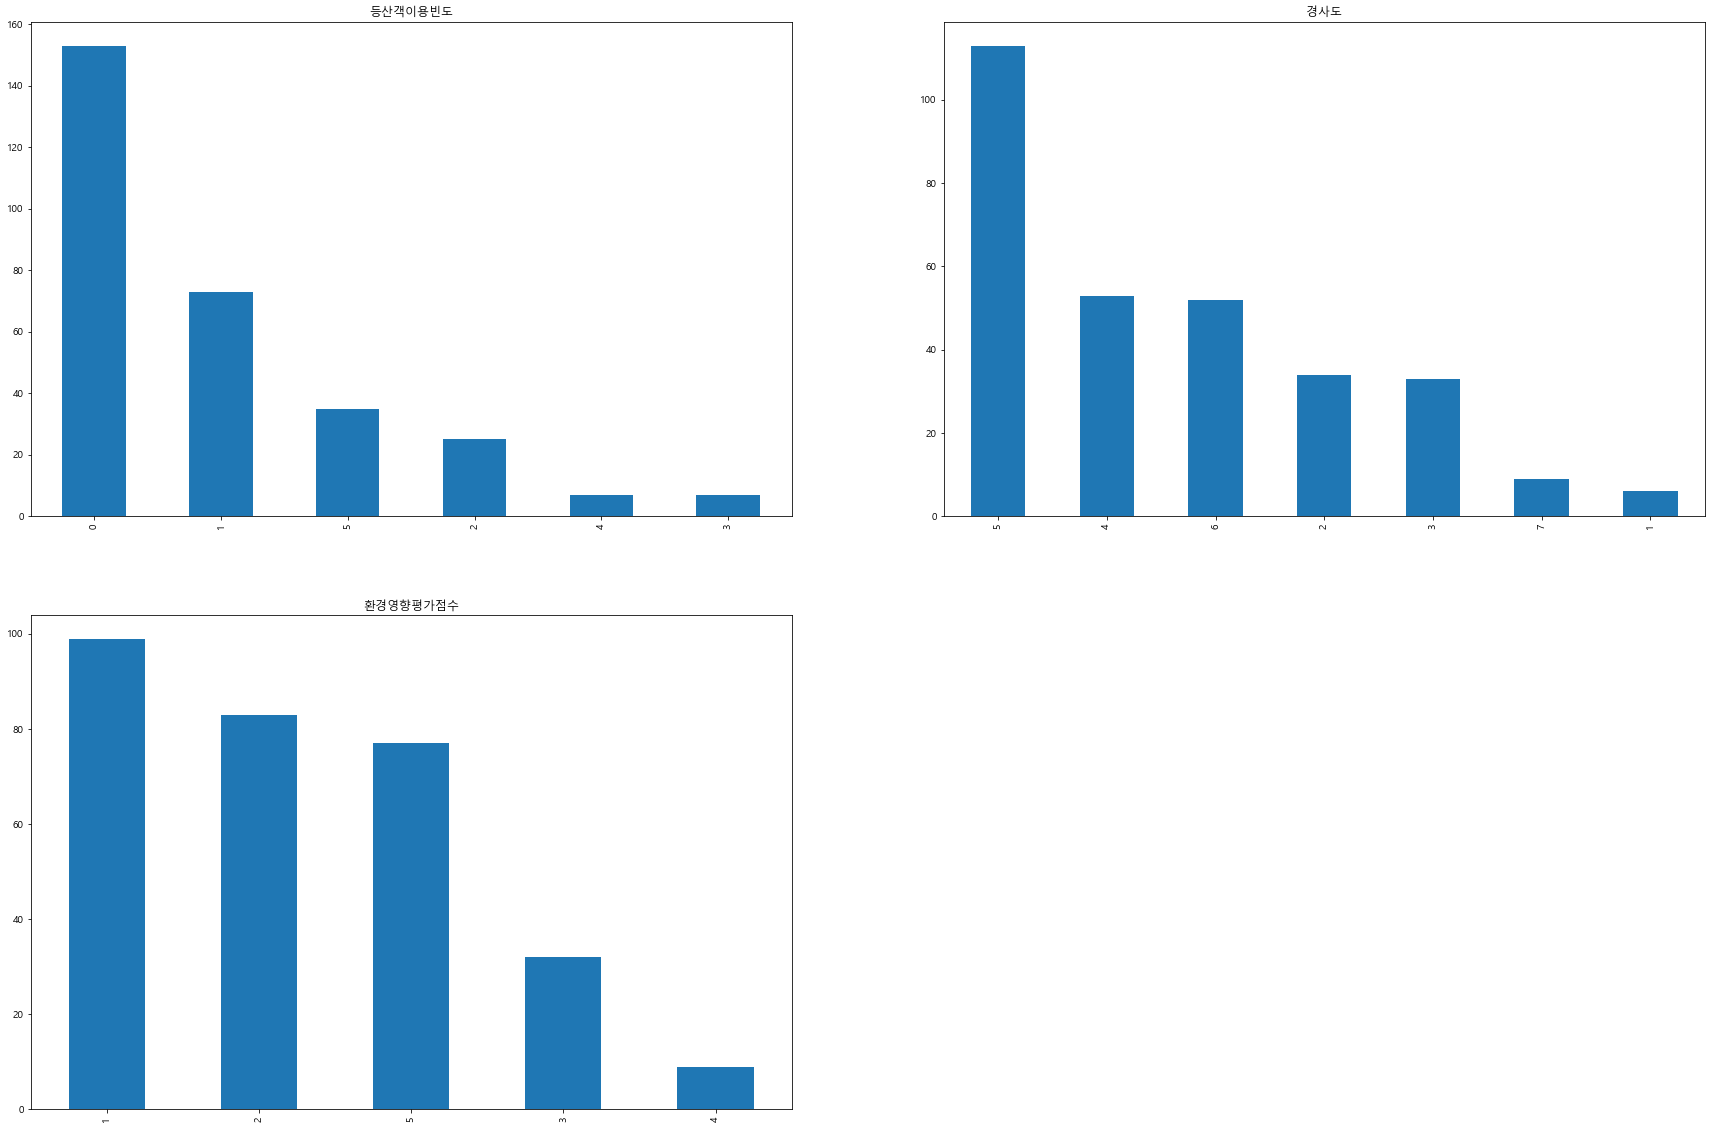

수치형 변수


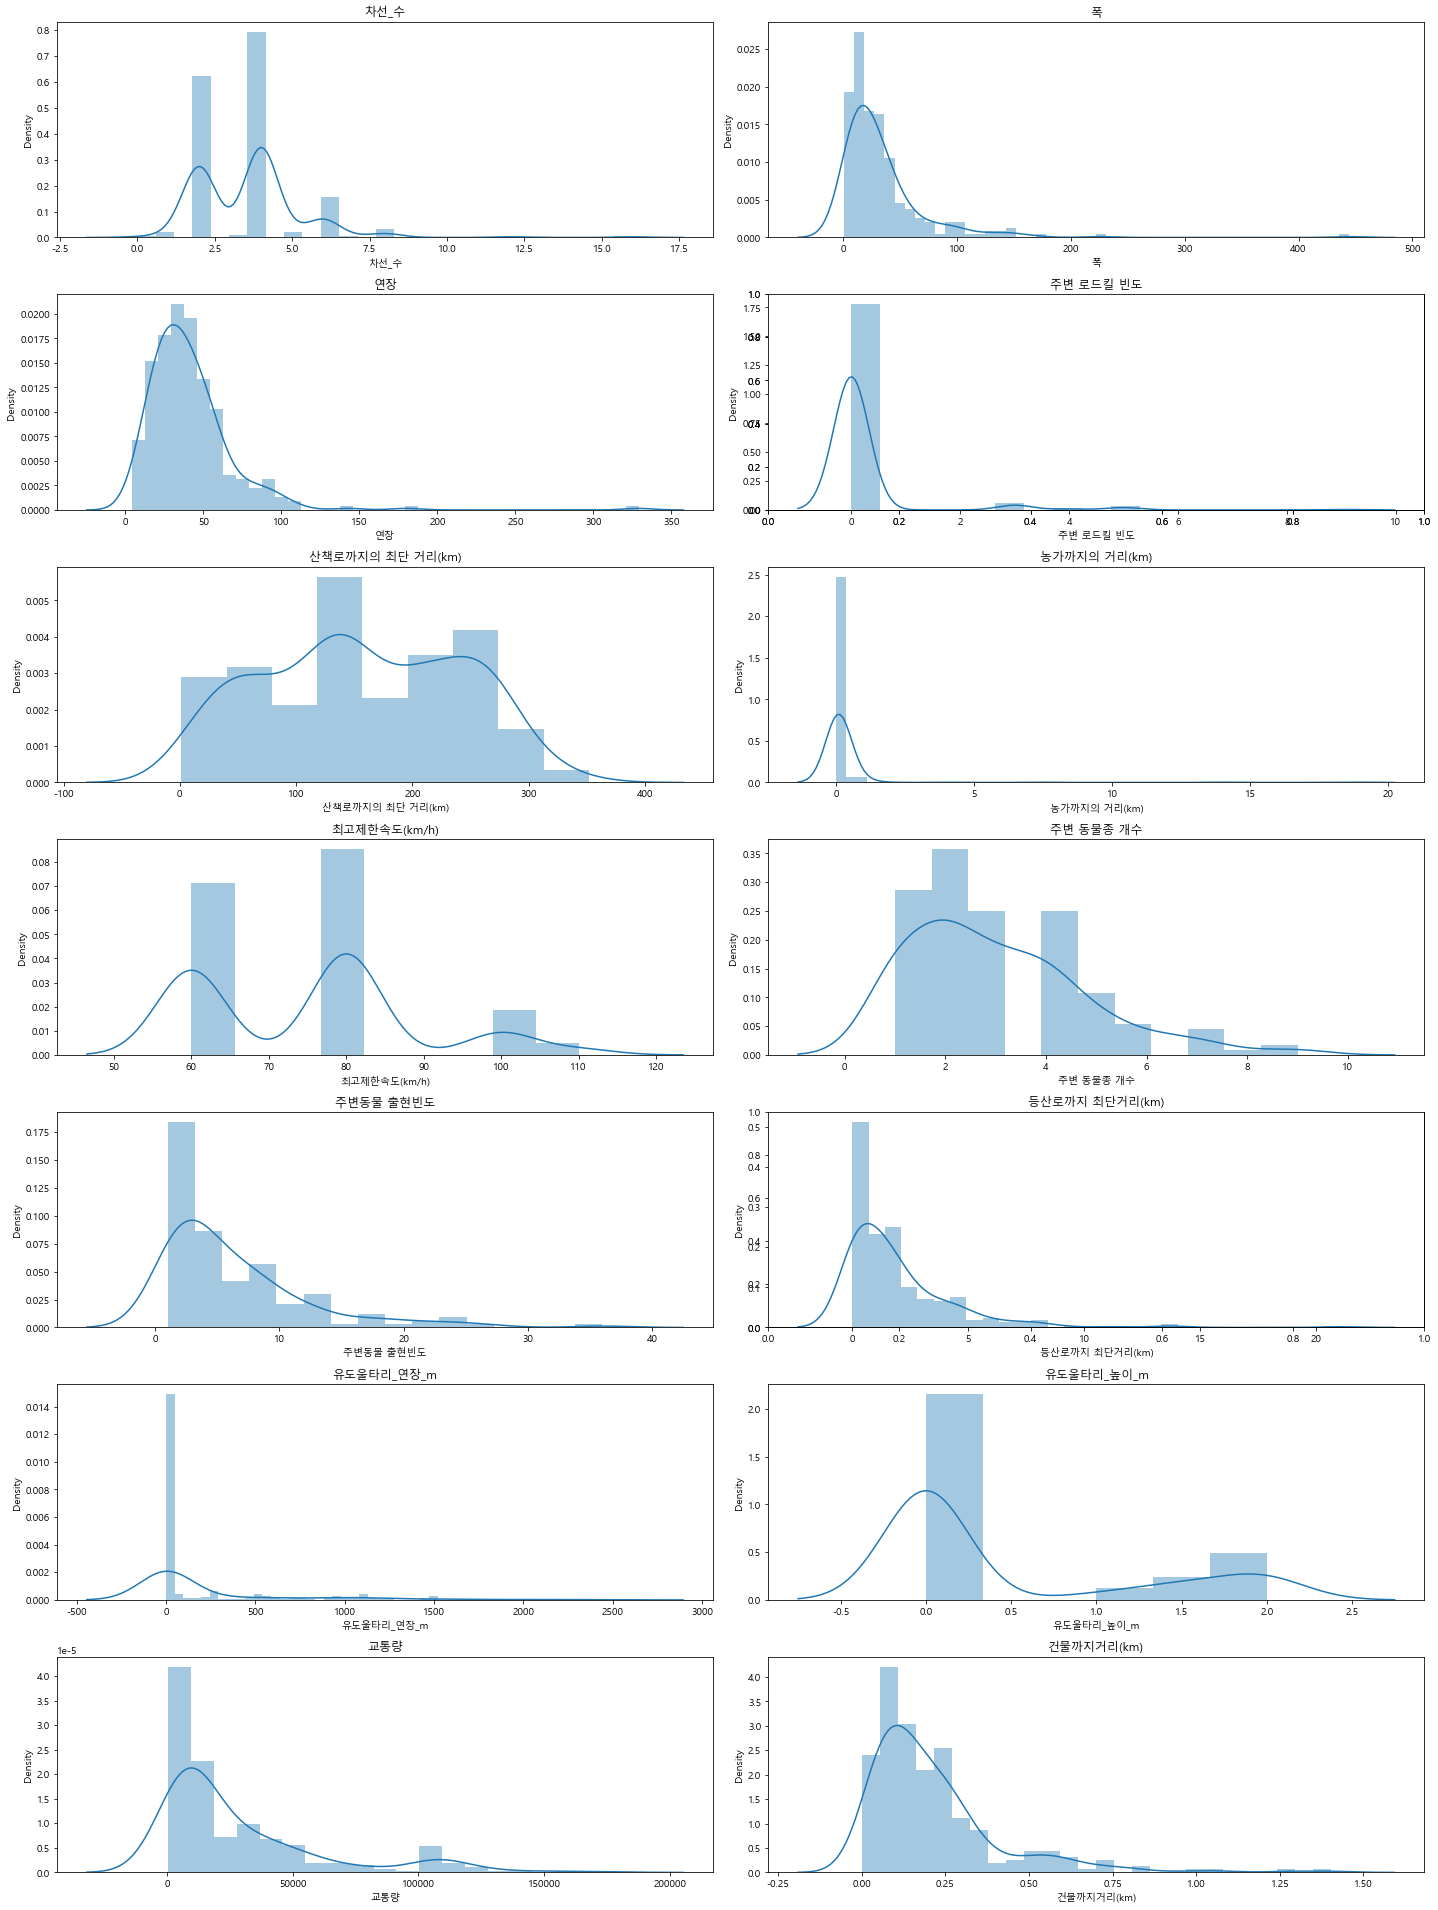

In [13]:
EDA(df_overpass)

# 터널형

결측치 비율


,column,count,ratio
3,폭,148,0.751269
4,연장,148,0.751269
5,높이,164,0.832487
6,개방도,164,0.832487
15,주변 동물종 개수,92,0.467005
16,주변동물 출현빈도,92,0.467005
21,교통량,2,0.010152


명목형 변수


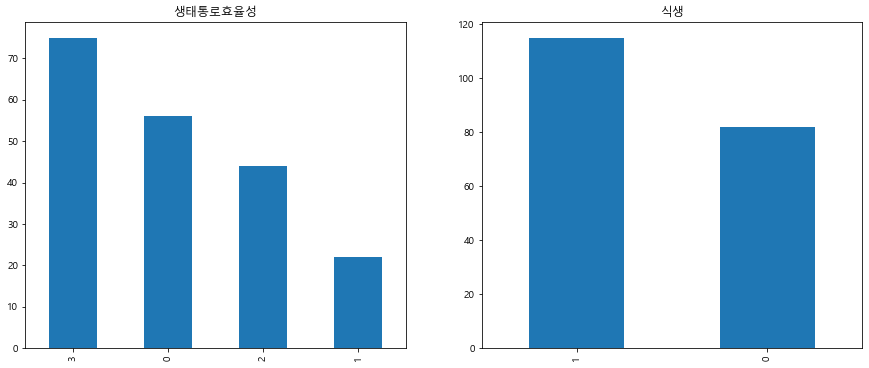

순서형 변수


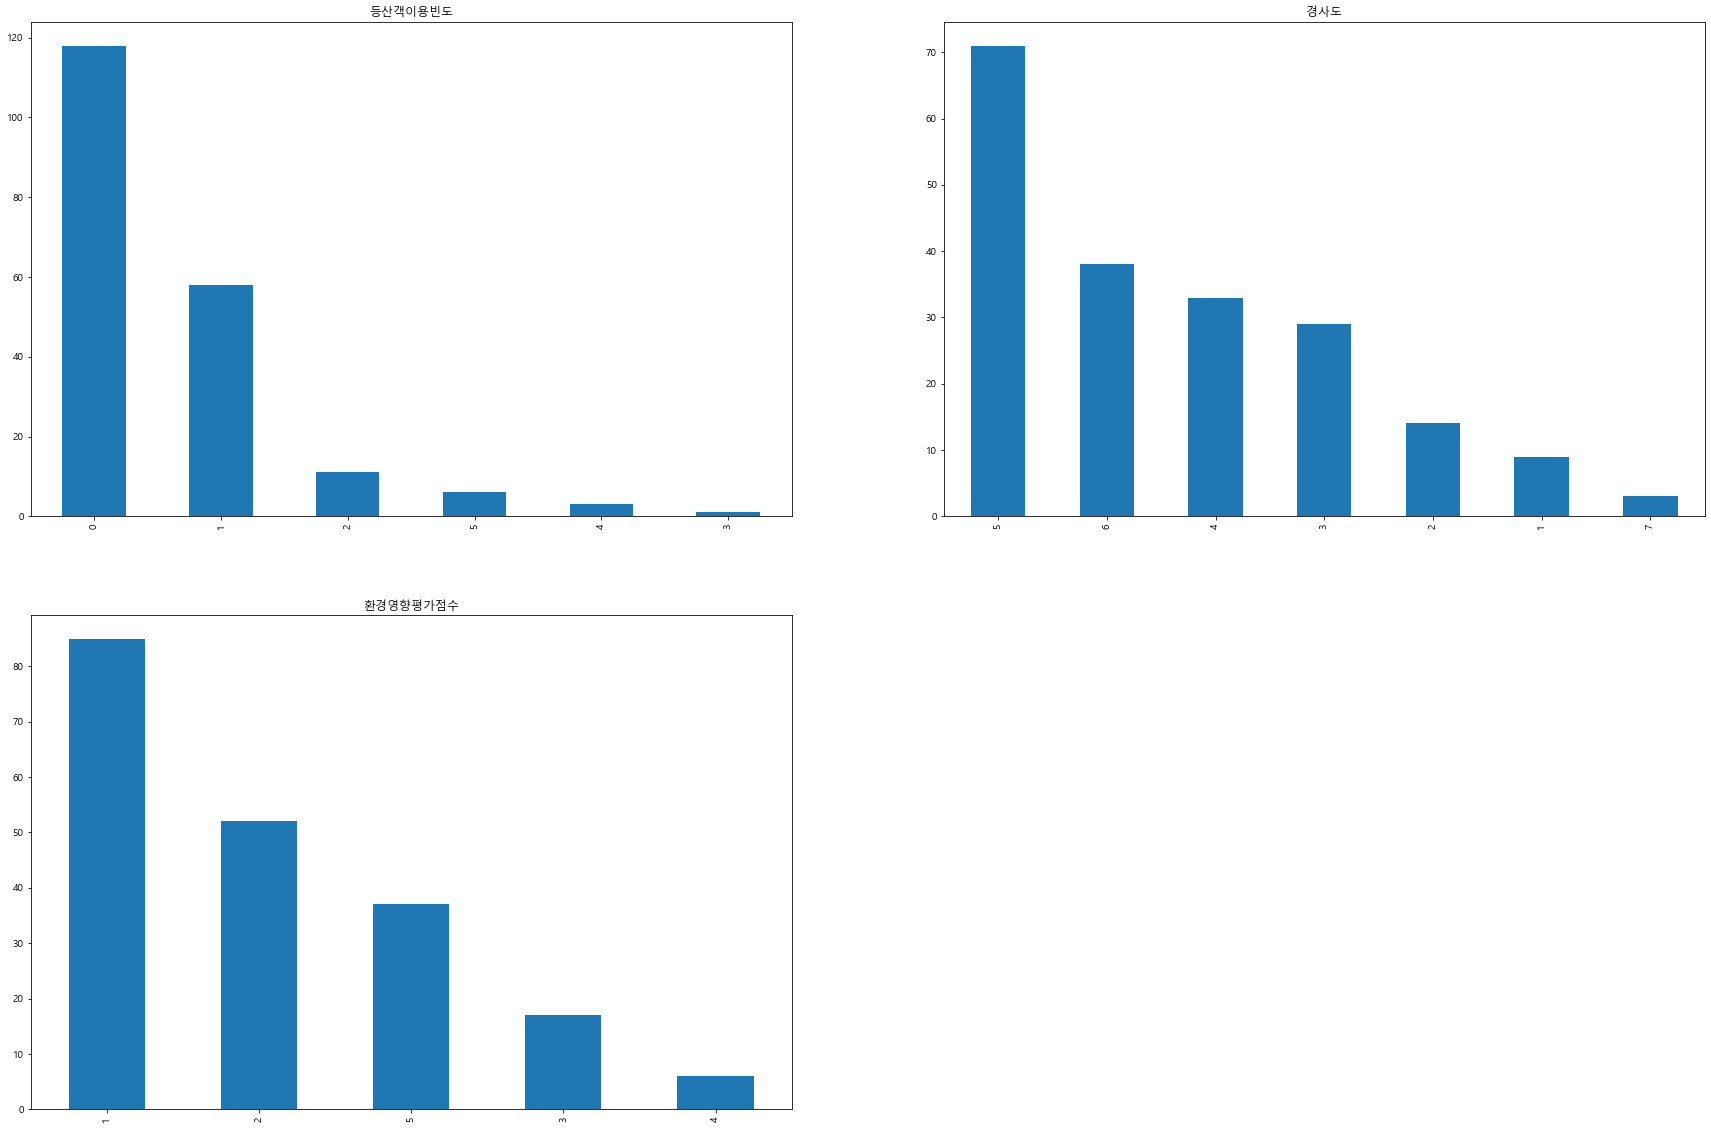

수치형 변수


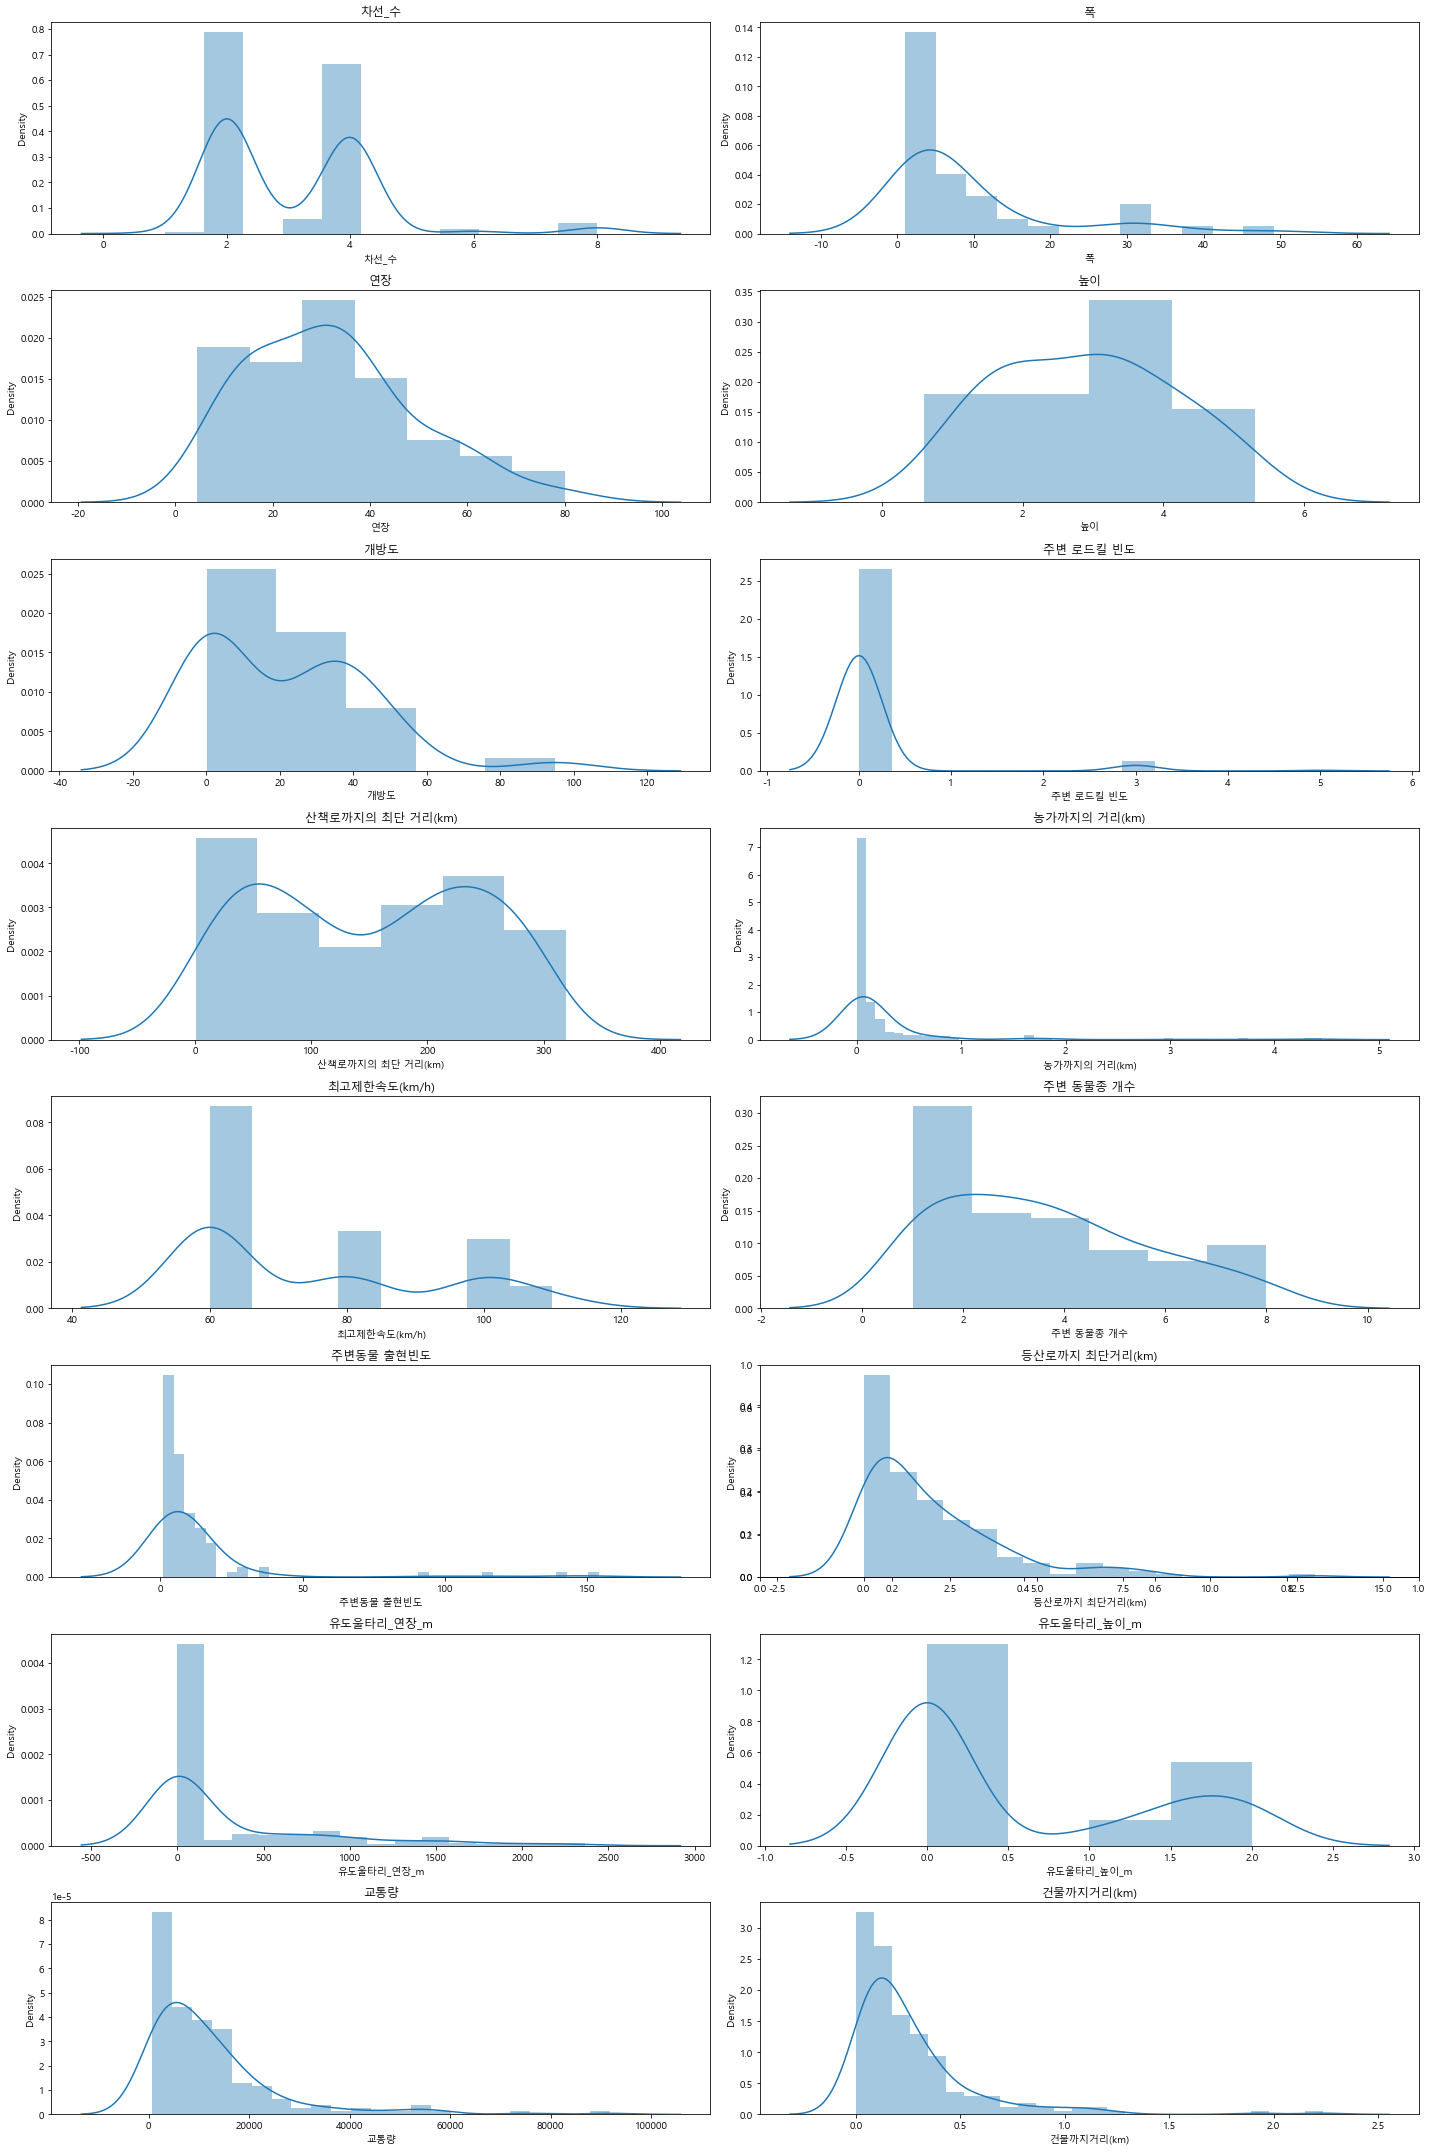

In [14]:
EDA(df_tunnel)